# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [263]:
# Import libraries necessary for this project
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [264]:
# Display a description of the dataset
display(data.describe())

Fresh          Milk       Grocery        Frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73498.000000  92780.000000  60869.000000   

       Detergents_Paper  Delicatessen  
count        440.000000    440.000000  
mean        2881.493182   1524.870455  
std         4767.854448   2820.105937  
min            3.000000      3.000000  
25%          256.750000    408.250000  
50%          816.500000    965.500000  
75%         3922.000000   1820.250000  
max        40827.000000  47943.000000

### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [265]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [81,47,125]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0    219   9540    14403     283              7818           156
1  44466  54259    55571    7782             24171          6465
2  76237   3473     7102   16538               778           918

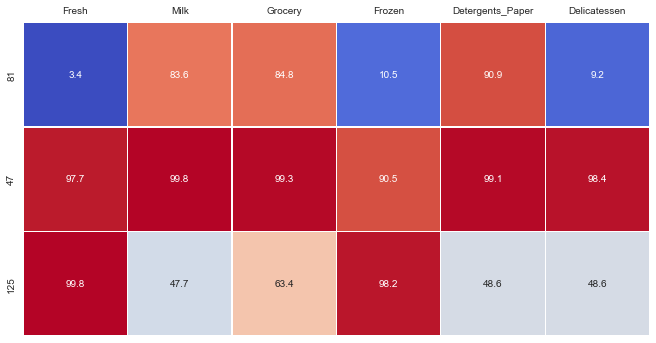

In [266]:
#Lets look at the percentile in which the features of the chosen indices belong:
import matplotlib.pyplot as plt
import seaborn as sns

rank = 100.* data.rank(axis=0,pct=True).iloc[indices].round(decimals=3)

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(rank,annot=True,cmap='coolwarm',square = True,cbar=False,linewidths=0.2,fmt='.1f')
ax.xaxis.tick_top()
# plt.xticks(rotation=45, ha='center')

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 7951.3
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


**Answer:**

**Sample 1:** From the six features at hand, we can see that this customers orders of *Milk, Groceries and Detergetns/Paper* is significantly high - falling in the top 20% for those three categories. The other commodities were purchased in relatively low amounts, significantly less than the mean. This customer could be a *cafe*. 

**Sample 2** This customer's orders for all six commodities were well above the mean, falling in the top 10%. This customer could potentially be a *wholesale reseller*.

**Sample 3** This customer ordered Fresh produce in bulk compared to the other commodities. This customer could potentially be a *produce market*.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [268]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import fbeta_score, accuracy_score
from sklearn.metrics import r2_score


# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop(['Detergents_Paper'],axis=1)

# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
X_train, X_test, y_train, y_test = train_test_split(new_data, data['Detergents_Paper'], test_size = 0.25, random_state = 5)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))


# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state=42)
regressor = regressor.fit(X_train,y_train)

# TODO: Report the score of the prediction using the testing set
predictions = regressor.predict(X_test)
score = r2_score(y_test,predictions)

print(score)

Training set has 330 samples.
Testing set has 110 samples.
0.7562135415597985


### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:**

I tried to predict the Detergents_Paper feature. My assumption was that this should be fairly easy to predict using the other features as it is an unliekly primary commodity for establishments. 

The reported score was 0.75, which indicates that a major proportion of the variance in our dependent varaible is predictable from the independent variables. Hence we can conclude that it is of low importance for identifying spending habits.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

C:\Users\amah\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


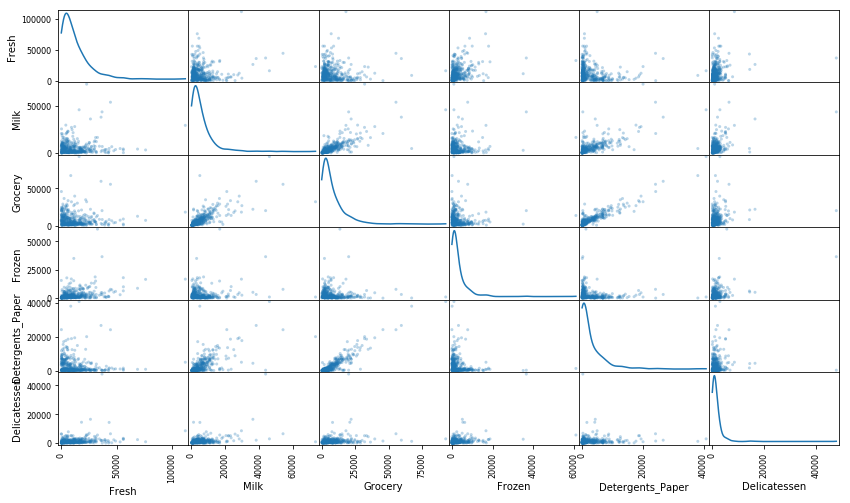

In [6]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

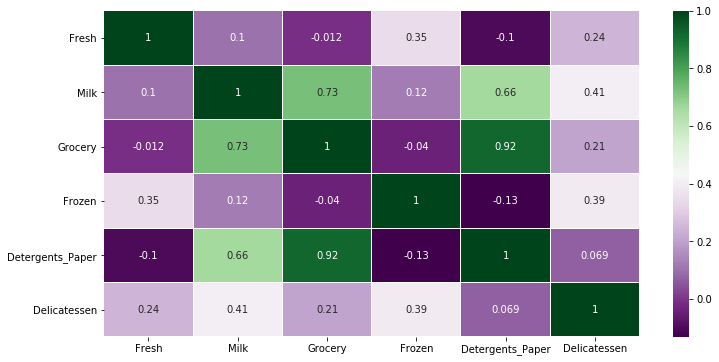

In [7]:
# Let's look at the correlation between the features using a heatmap:
fig,ax = plt.subplots(figsize=(12,6))
sns.heatmap(data.corr(),annot=True,linewidths=0.1,cmap='PRGn')

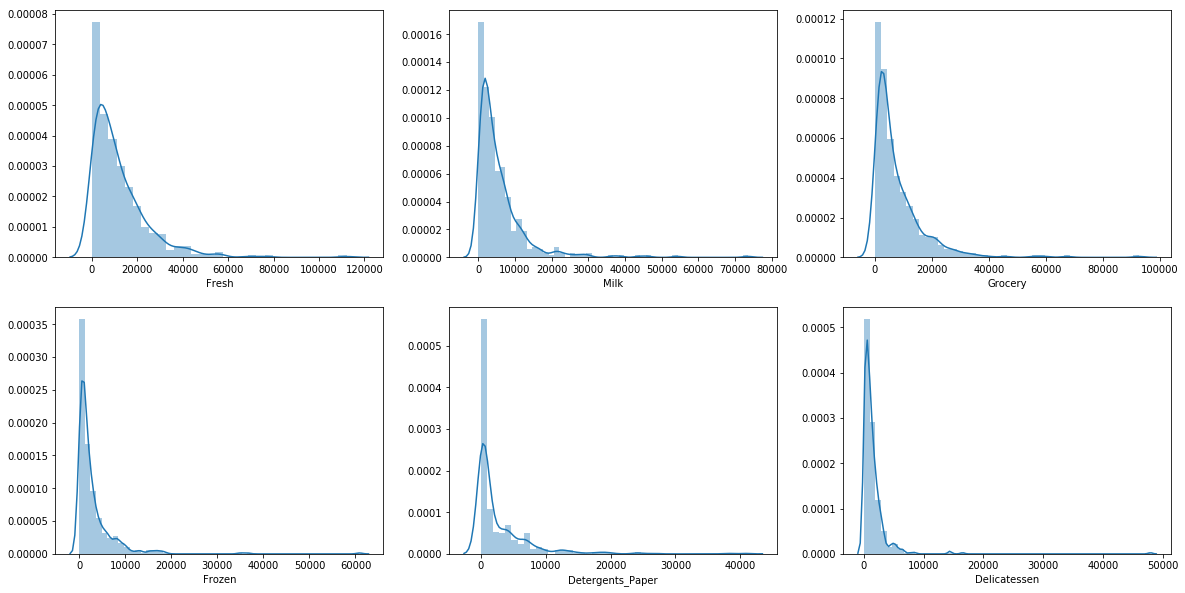

In [10]:
#Let's look at the distribution of the different features in detail:
fig,ax = plt.subplots(nrows=2, ncols=3,figsize=(20,10))

for i in range(len(data.keys())):
    plt.subplot(2,3,i+1)
    sns.distplot(data[headers[i]])


**Answer:**

Looking at the scatter plot matrix, we can see a lot of them are centering near zero, with the exception of a few pairs. This gives us an indication that the distribution is postively skewed. Further investigation into the distribution of the data confirms this. 

From the scatterplot and the correlation heatmap, we can see how the Grocery & Detergents, Grocery & Milk and the Detergents & Milk pairs are correlated. This confirms our suspicion of the Detergents_Paper feature having low importance in terms of predicting customer behavior.

We have some outliers in the data and they are mainly near the mode of the data. 

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

C:\Users\amah\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


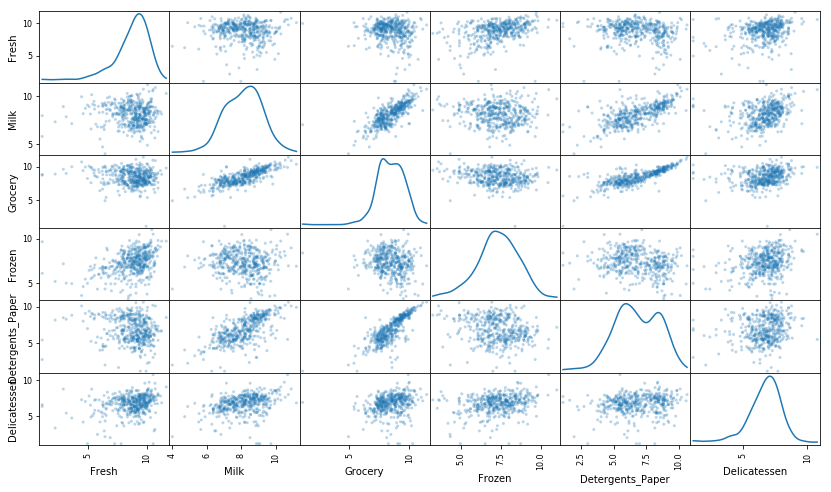

In [11]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

Fresh       Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
0   5.389072   9.163249   9.575192  5.645447          8.964184      5.049856
1  10.702480  10.901524  10.925417  8.959569         10.092909      8.774158
2  11.241602   8.152774   8.868132  9.713416          6.656727      6.822197

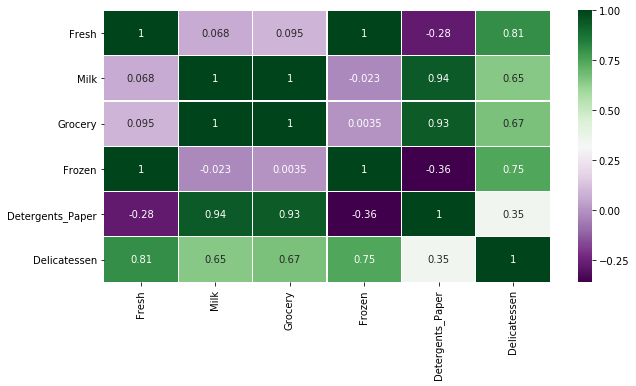

In [12]:
# Display the log-transformed sample data
display(log_samples)
fig = plt.subplots(figsize=(10,5))
sns.heatmap(log_samples.corr(),annot=True,linewidths=0.1,cmap='PRGn')

### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [13]:
all_outliers = {}
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],q=25.0)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],q=75.0)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3-Q1)
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    outliers = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    display(outliers)    
    
    for outlier in outliers.index:
        outlier_details = all_outliers.get(str(outlier),{'count':0,'features':[]})
        outlier_details['count'] += 1
        outlier_details['features'].append(feature)
        all_outliers[str(outlier)] = outlier_details
    
print('Total nunmber of outliers found: {}'.format(len(all_outliers)))        
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = []

Data points considered outliers for the feature 'Fresh':


Fresh       Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
65   4.442651   9.950323  10.732651  3.583519         10.095388      7.260523
66   2.197225   7.335634   8.911530  5.164786          8.151333      3.295837
81   5.389072   9.163249   9.575192  5.645447          8.964184      5.049856
95   1.098612   7.979339   8.740657  6.086775          5.407172      6.563856
96   3.135494   7.869402   9.001839  4.976734          8.262043      5.379897
128  4.941642   9.087834   8.248791  4.955827          6.967909      1.098612
171  5.298317  10.160530   9.894245  6.478510          9.079434      8.740337
193  5.192957   8.156223   9.917982  6.865891          8.633731      6.501290
218  2.890372   8.923191   9.629380  7.158514          8.475746      8.759669
304  5.081404   8.917311  10.117510  6.424869          9.374413      7.787382
305  5.493061   9.468001   9.088399  6.683361          8.271037      5.351858
338  1.098612   5.808142   8.856661  9.655090          2.708050      6.309918
353  4.762174   8.742574   9.961898  5.429346          9.069007      7.013016
355  5.247024   6.588926   7.606885  5.501258          5.214936      4.844187
357  3.610918   7.150701  10.011086  4.919981          8.816853      4.700480
412  4.574711   8.190077   9.425452  4.584967          7.996317      4.127134

Data points considered outliers for the feature 'Milk':


Fresh       Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
86   10.039983  11.205013  10.377047  6.894670          9.906981      6.805723
98    6.220590   4.718499   6.656727  6.796824          4.025352      4.882802
154   6.432940   4.007333   4.919981  4.317488          1.945910      2.079442
356  10.029503   4.897840   5.384495  8.057377          2.197225      6.306275

Data points considered outliers for the feature 'Grocery':


Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
75   9.923192  7.036148  1.098612  8.390949          1.098612      6.882437
154  6.432940  4.007333  4.919981  4.317488          1.945910      2.079442

Data points considered outliers for the feature 'Frozen':


Fresh      Milk    Grocery     Frozen  Detergents_Paper  Delicatessen
38    8.431853  9.663261   9.723703   3.496508          8.847360      6.070738
57    8.597297  9.203618   9.257892   3.637586          8.932213      7.156177
65    4.442651  9.950323  10.732651   3.583519         10.095388      7.260523
145  10.000569  9.034080  10.457143   3.737670          9.440738      8.396155
175   7.759187  8.967632   9.382106   3.951244          8.341887      7.436617
264   6.978214  9.177714   9.645041   4.110874          8.696176      7.142827
325  10.395650  9.728181   9.519735  11.016479          7.148346      8.632128
420   8.402007  8.569026   9.490015   3.218876          8.827321      7.239215
429   9.060331  7.467371   8.183118   3.850148          4.430817      7.824446
439   7.932721  7.437206   7.828038   4.174387          6.167516      3.951244

Data points considered outliers for the feature 'Detergents_Paper':


Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
75   9.923192  7.036148  1.098612  8.390949          1.098612      6.882437
161  9.428190  6.291569  5.645447  6.995766          1.098612      7.711101

Data points considered outliers for the feature 'Delicatessen':


Fresh       Milk    Grocery     Frozen  Detergents_Paper  \
66    2.197225   7.335634   8.911530   5.164786          8.151333   
109   7.248504   9.724899  10.274568   6.511745          6.728629   
128   4.941642   9.087834   8.248791   4.955827          6.967909   
137   8.034955   8.997147   9.021840   6.493754          6.580639   
142  10.519646   8.875147   9.018332   8.004700          2.995732   
154   6.432940   4.007333   4.919981   4.317488          1.945910   
183  10.514529  10.690808   9.911952  10.505999          5.476464   
184   5.789960   6.822197   8.457443   4.304065          5.811141   
187   7.798933   8.987447   9.192075   8.743372          8.148735   
203   6.368187   6.529419   7.703459   6.150603          6.860664   
233   6.871091   8.513988   8.106515   6.842683          6.013715   
285  10.602965   6.461468   8.188689   6.948897          6.077642   
289  10.663966   5.655992   6.154858   7.235619          3.465736   
343   7.431892   8.848509  10.177932   7.283448          9.646593   

     Delicatessen  
66       3.295837  
109      1.098612  
128      1.098612  
137      3.583519  
142      1.098612  
154      2.079442  
183     10.777768  
184      2.397895  
187      1.098612  
203      2.890372  
233      1.945910  
285      2.890372  
289      3.091042  
343      3.610918

Total nunmber of outliers found: 42


In [14]:
for outlier in all_outliers:
    details = all_outliers.get(outlier)
    outliers.append(int(outlier))
    if(details['count']>1):
        
        print('Outlier {} found {} times in the features {}'
              .format(outlier,len(details['features']),details['features']))
        
# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Outlier 65 found 2 times in the features ['Fresh', 'Frozen']
Outlier 66 found 2 times in the features ['Fresh', 'Delicatessen']
Outlier 128 found 2 times in the features ['Fresh', 'Delicatessen']
Outlier 154 found 3 times in the features ['Milk', 'Grocery', 'Delicatessen']
Outlier 75 found 2 times in the features ['Grocery', 'Detergents_Paper']


### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer:** Based on the definition of outlier that we have set, we have 42 unique outliers in total. Amongst these, 5 of them occur in more than one feature. When we see outliers occuring in more than one feature, it is a good indication that they are outliers for the whole dataset across all the features in general and should be removed. However, we should remove all the outliers, as using 1.5IQR is roughly equivalent to ±3σ, which would declare about 1% of measurements as outliers. As most clustering methods depend on calculating the distance of a data point from the centroid for clustering, removing outliers would help us cluster the data much more accurately.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

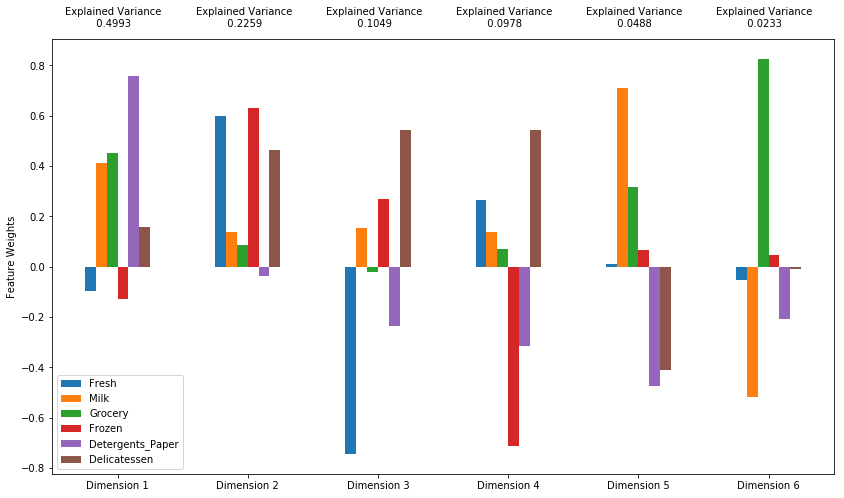

In [15]:
from sklearn.decomposition import PCA
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components = 6)
pca.fit_transform(good_data)
# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

In [16]:
#Let's look at the explained variance by using the different dimensions:
for i in range(6):
    print('Total explained variance using the first {} components: {}'
          .format(i+1,pca.explained_variance_ratio_ .cumsum()[i].round(decimals=3)))


Total explained variance using the first 1 components: 0.499
Total explained variance using the first 2 components: 0.725
Total explained variance using the first 3 components: 0.83
Total explained variance using the first 4 components: 0.928
Total explained variance using the first 5 components: 0.977
Total explained variance using the first 6 components: 1.0


### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:** 

The amount of explained variance we get using just the first 2 components is about 72.5%. When we add two more, where each dimension weighs roughly 10% each , we get a total of 92.8%.

When we look at the feature weights of each of the dimensions, we can see different patterns of spendings of the customers. 

* For the first dimension, we see a pattern of realtively high spending on *Detergents, Milk and Groceries*, with spending on detergent and paper being ranked highest. This means we can roughly explain 50% of of the variance in the dataset using customers which follow similar patterns. This is interesting as earlier during the data exploration, we concluded that the detergents & paper feature is not adding much information to explain the variance in the data.

* For the second dimension, we see postive heavy weights being assigned to the *Fresh, Frozen and Delicatessen* features and much lower weights to the ones wighted highly in the first principal component. We could argue that this kind of customers needs rarely overlap with the one represented by the first component and hence are in two different segments.

* For the thrid dimension, which represents 10% of the variance in our data, has high positive weights for the *Milk, Frozen and Delicatessen* features and a high negative weight to the *Fresh* feature, indicating that customers with this pattern rarely buys fresh produce. 

* For the fourth dimension, which also represents about 10% variance in our data, represents customers who spends an above average amount on *Fresh, Milk, Grocery and Delicatessen* and very low on *Frozen & Detergents_Paper*. 


### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [17]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

Dimension 1  Dimension 2  Dimension 3  Dimension 4  Dimension 5  \
0       2.9009      -3.9054       0.8416      -1.0884       0.6364   
1       4.7265       3.4113      -0.2381      -0.0287       0.5103   
2      -0.3980       2.8829      -1.0725      -0.9247       0.3976   

   Dimension 6  
0       0.0886  
1      -0.0973  
2       0.3645

### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [18]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [19]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

Dimension 1  Dimension 2
0       2.9009      -3.9054
1       4.7265       3.4113
2      -0.3980       2.8829

## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

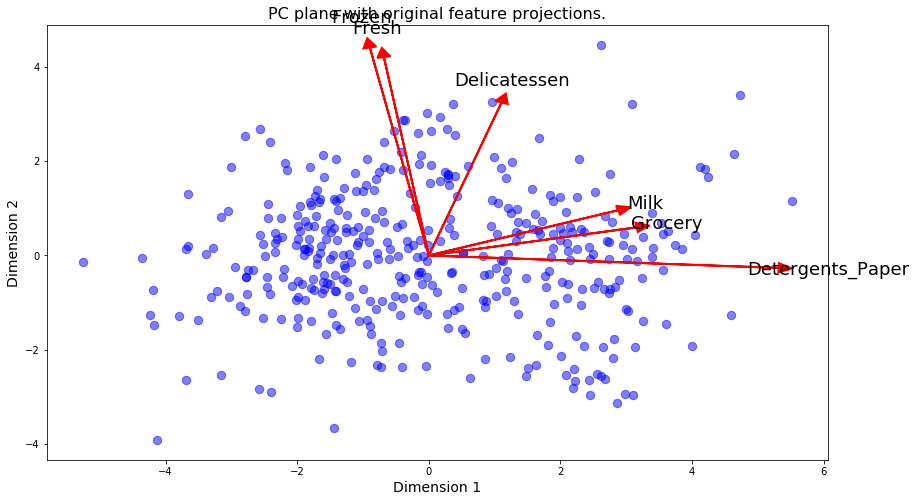

In [20]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:**

K-means is a simple clustering algorithm which performs *hard clustering*. It's advantages include:

* Computationally inexpensive
* Works great for spherical data

Gaussian mixture model clustering is based on the expectation maximization algorithm. It's advantages include:

* Cluster shape flexibility - works well with many shapes of clusters
* Performs soft clustering - which lets us have sample membership of multiple clusters

We have a great advantage using GMM since we have already normalized our data i.e. it would be fairly easy to represent our data using Gaussian distribution models. Besides this, GMM allows us to perform soft clustering - where the membership of a data point could be shared between clusters - which I believe is very useful for clustering our customer dataset.


### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [54]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

def computeGMM(clusters):
    global clusterer, preds, centers, sample_preds
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = GaussianMixture(n_components=clusters).fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.means_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data,preds)
    
    return score

no_of_clusters = []
scores = []
for cluster in range(2,15):
    no_of_clusters.append(cluster)
    scores.append(computeGMM(cluster))

Clusters  Silhouette Scores
0          2           0.446754
1          3           0.361194
2          4           0.307028
3          5           0.329931
4          6           0.316758
5          7           0.259504
6          8           0.278590
7          9           0.312816
8         10           0.326179
9         11           0.309995
10        12           0.307340
11        13           0.318596
12        14           0.308008

Text(0.5,1,'Silhouette scores vs No. of Clusters')

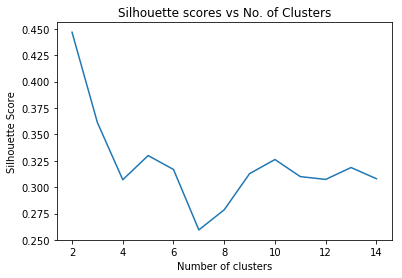

In [55]:
all_scores = pd.DataFrame({
    'Clusters':no_of_clusters,
    'Silhouette Scores': scores
})

display(all_scores)

plt.plot(no_of_clusters,scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette scores vs No. of Clusters')

### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer:** The silhouette score is the highest with only two clusters, at **0.447412**. As we try adding more clusters, it goes down to as low as **0.275822** for eight clusters.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

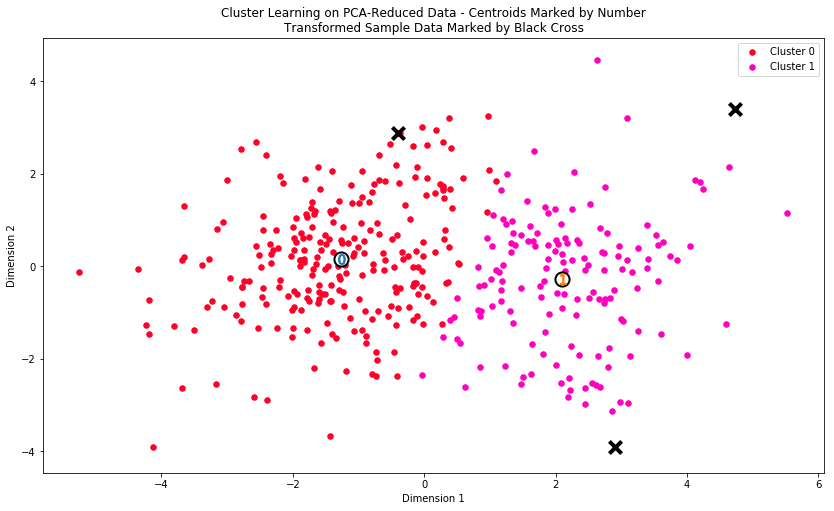

In [62]:
# Display the results of the clustering from implementation
clustering_final = computeGMM(2)
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [234]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

Fresh    Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
Segment 0  9494.0  2049.0   2598.0  2203.0             337.0         796.0
Segment 1  5219.0  7671.0  11403.0  1079.0            4413.0        1099.0

In [236]:
compare_w_mean = true_centers.append(data.mean(),ignore_index=True)
compare_w_mean.index = ['Segement 0','Segment 1','Mean']
plt.rcParams['figure.figsize']= (12,6)
plt.style.use('fivethirtyeight')
compare_w_mean.plot.bar()

In [244]:
display(compare_w_mean)

Fresh         Milk       Grocery       Frozen  \
Segement 0   9494.000000  2049.000000   2598.000000  2203.000000   
Segment 1    5219.000000  7671.000000  11403.000000  1079.000000   
Mean        12000.297727  5796.265909   7951.277273  3071.931818   

            Detergents_Paper  Delicatessen  
Segement 0        337.000000    796.000000  
Segment 1        4413.000000   1099.000000  
Mean             2881.493182   1524.870455

### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

**Answer:** 

Our clustering algorithm lead us to the two following segments of customers:

**Segment 0:** The average customer in this segment appears to spend a lot more on fresh goods compared to the other kind of products. Besides frozen and delicantessen, the expenditure on the other products fall way below the mean of the overall data set. We could argue that this cluster best represents establishments such as restaurants and cafes.

**Segment 1** This segment can be characterized with customers with more than average spending on milk, grocery and detergents products. Besides those, the expenditure on rest of the products fall below the mean of the total customers. We could argue that this cluster best represents customers who could be resellers or markets - focusing on goods other than meat products - unlike the first segment. 

### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [255]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)
display(samples)    

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0


Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0    219   9540    14403     283              7818           156
1  44466  54259    55571    7782             24171          6465
2  76237   3473     7102   16538               778           918

**Answer:**

* **Sample 0:** Our clustering algorithm puts this sample in **'cluster 1'**. Previously, when we tried to understand the customer segments, we hypothesized that this cluster could represent markets or resellers. This customer is characterized by their high spending on *Milk, Grocery adn Detergents goods.* From the visualization earlier, we can see that this customer is at the bottom edge of the cluster 1, mainly due to the very low expenditure on *Fresh* products. In the data exploration section, I suggested that this customer could potentially be a cafe. However, our clustering puts this along with other customers we suggested could be resellers or markets.


* **Sample 1:** This customer is also predicted to be in **'cluster 1'**. Looking at the visualization and the numbers, we can see that this customer is at the top right edge of the cluster. This customer is characterized by more than average spending on almost all the product categories. Earlier in the data exploration section, we hypothesized that this customer could potentially be a reseller. Our clustering seems to agree with that.


* **Sample 2:** This customer is predicted to be in **cluster 0**. Earlier, we suggested that this cluster could represent establishments such as restaurants and cafes - mainly characterized by high expenditure on *Fresh,Frozen and Delicantessen* products. In the data exploration section, we suggested that this customer could potentially be a produce market. Our clustering did not end up with such a specific segment - however it would have been less surprising if it was clustered in the other segment. But, one interesting thing to note here is the position of this customer in the cluster - it is quite close to cluster 1 - which we think could represent markets and resellers mainly.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:** To recap, our algorithm has segmented our customers in two clusters:

* Cluster 1: Representing establishments best identified as restaurants, cafe's and hotels - requiring a primarily large supply of fresh food.
* Cluster 2: Representing establishments best identified as resellers or markets - purchasing products in bulk

Since we have different segments of customers in our data set, it would be more fair to assume that the changes affect customers differently based on their segments.

If the distributor is planning to change its delivery schedule to 3 days a week, it would possibly get positive results testing with a group of customers from the Cluster 2. Since the establishments in this cluster stock products in bulk, and non-perishible goods, shortening the delivery schedule might not affect them negatively that much or could be positive. However, to statistically confirm the results, the wholsale distributor should run A/B tests on a portion of each segment.




### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:** After clustering our data into different segments, we are able to assign new labels to our prevoiusly unlabeled data. Once we have labels for our data, predicting the customer segment of new customers becomes a supervised learning classification problem. 

A SVM could be trained on our labeled data, the labels which we obtained through clustering and we could use this model to predict new customers. Here, our target label will be the cluster number.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

In [261]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:** After reintroducing the 'Channel' data, we can see that the distinction between the two customer segments produced earlier, is now less clear. However, our clustering algorithm still does a good job at segmenting the customers - as there's a large part of our customer base who could be easily segmented as purely 'HoReCa' or purely 'Retailers' and also illustrated by consistent labelling of our sample points.

Looking at the distribution labeled by 'Channel', we can see there's quite a number of Hotel/Restaurant/Cafe customers who would be labeled as 'Retailers' by our clustering. This could be due to these establishments big large enough to place orders in the same magnitude as 'Retailers'. 

The clustering algorithm's predictions are not entirely consistent with the ones we made in the data exploration section. We predicted that both samples 1 and 2 would fall in to the category of resellers/markets, due to their large spending. However, our clustering identified a hidden combination of *Fresh,Frozen & Delicatessen* products being key to hotels, restaurants and cafes, and identified sample 2 as a 'HoReCa' due to their large spending on those products. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.